
1 . Existing User 
2 . New User 
3 . Exit System


Enter Choice :  2
Create a UserName (Length > 5 and no space) :  Rjp123
Enter Password Ex. Abc@123L  ········


Please Create a valid Password


Enter Password Ex. Abc@123L  ········


Please Create a valid Password


Enter Password Ex. Abc@123L  ········


Password Created !!
Today's Market Graph
Today's Market Change is : Datetime
2024-08-09 09:30:00-04:00    0.122864
2024-08-09 10:30:00-04:00    0.054305
2024-08-09 11:30:00-04:00   -0.115897
2024-08-09 12:30:00-04:00    0.701087
2024-08-09 13:30:00-04:00   -0.363401
2024-08-09 14:30:00-04:00    0.126137
2024-08-09 15:30:00-04:00    0.037813
dtype: float64


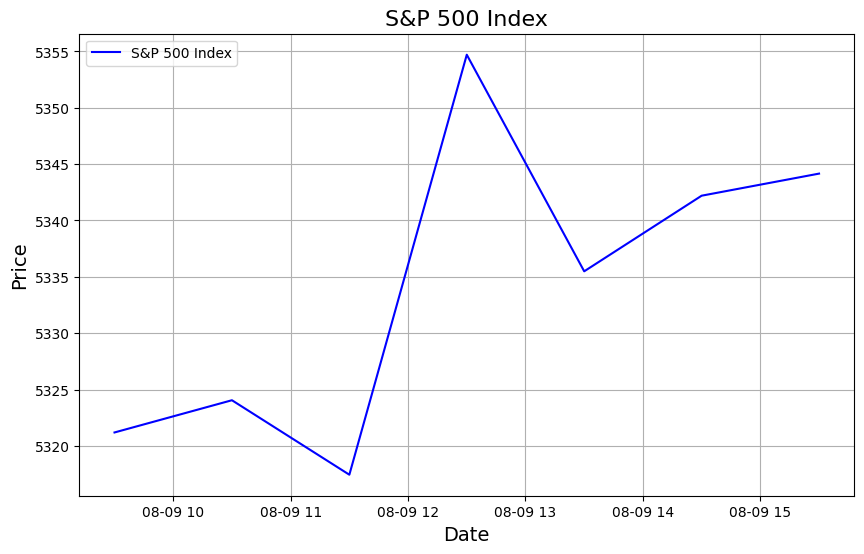

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import textwrap
import getpass

class Stock:
    def __init__(self, symbol):
        self.symbol=self.check_symbol(symbol)
        self.ticker=yf.Ticker(self.symbol)
        self.data=None

    def check_symbol(self,symbol):
        self.ticker=yf.Ticker(symbol)
        info=self.ticker.info
        while info.get('longName')==None:
            symbol=input("Enter Valid Stock Symbol : ")
            self.ticker=yf.Ticker(symbol)
            info=self.ticker.info
        return symbol.upper()
    
    def Todays_Markets_gain(self):
        # Fetch data for a specific index or sector
        data = yf.Ticker("^GSPC").history(period='1d', interval='1h')  # S&P 500 index example
        # Calculate percentage change for each stock
        Percentage_change= (data['Close'] - data['Open']) / data['Open'] * 100
        print("Today's Market Change is :",Percentage_change)
        plt.figure(figsize=(10, 6))
        plt.plot(data.index,data['Close'], color='blue', label='S&P 500 Index')
        
        # Adding titles and labels
        plt.title('S&P 500 Index', fontsize=16)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Price', fontsize=14)
        
        # Adding grid and legend
        plt.grid(True)
        plt.legend(loc='upper left')
        
        # Show plot
        plt.show()
        
    def Interval_data(self):
        
        period_options = ["1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", "ytd", "max"]
        print("Choose period:")
        for period_no, period in enumerate(period_options):
            print(f"{period_no + 1}. {period}")
        
        period_choice = int(input("Enter the number corresponding to your choice: ")) - 1
        period = period_options[period_choice]
        if period=="1d":
            interval_options = ["1m","2m","5m","15m", "30m", "1h"]
            print("\nChoose interval:")
            for interval_no, interval in enumerate(interval_options):
                print(f"{interval_no + 1}. {interval}")
            
            interval_choice = int(input("Enter the number corresponding to your choice: ")) - 1
            interval = interval_options[interval_choice]
        elif period=="5d":
            interval="30m"

        else:
            interval="1d"
    
        title=self.symbol,period,"period of data"
        # Set title and labels
        plt.figure(figsize=(16, 8))
        plt.title(title, fontsize=24)
        plt.xlabel('TimeLine', fontsize=18)
        plt.xticks(fontsize=16)  # Adjust the fontsize as needed
        plt.ylabel('Price', fontsize=18)
        plt.yticks(fontsize=16)  # Adjust the fontsize as needed
        plt.tick_params(axis='x', which='minor', labelsize=10)  # Adjust the fontsize as needed
        

        self.set_xaxis_labels(period,interval)
        # Add grid lines
        plt.grid(True, which='major', linestyle='--', linewidth=0.5)
        
        # Add legend
        plt.legend(loc='upper left')
        
        # Adjust layout
        plt.tight_layout()
        
        # Show plot
        plt.show()

    def set_xaxis_labels(self,period, interval):
        # setting the x axis locators and fetch's data of specified period and differing by given time interval
        ax = plt.gca()  # Get the current axes
        if period.endswith('1d'):
            
            data=self.ticker.history(period=period, interval=interval)
            plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)
            
            plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
            # Extract time component from the datetime index
            if interval.endswith('m'):
                times = data.index.time[0::15]
            
                # Set custom ticks and labels on the x-axis using the time component
                plt.xticks(data.index[0::15], times)

            else:
                times = data.index.time
            
                # Set custom ticks and labels on the x-axis using the time component
                plt.xticks(data.index, times)
        
        elif period.endswith('5d'):
            
            data = self.ticker.history(period=period, interval=interval)
            plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)
            
            # Set major locator and formatter for daily data
            plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

        elif period.endswith('mo'):

            data = self.ticker.history(period=period, interval=interval)
            plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)

            #setting the gap between the two grid on x-axis
            if period.startswith('1'):
                plot_interval=1

            elif period.startswith('3'):
                plot_interval=5

            elif period.startswith('6'):
                plot_interval=7

            plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability

            #set the x-axis labels in the given formate using matplotlib.dates library
            plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=plot_interval))
            plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d'))  # Set minor formatter for time display

            plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Set major formatter for time display

        elif period.endswith("y") or period=='ytd':
            data = self.ticker.history(period=period, interval=interval)
            plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)

            if interval=="2m":
                plot_interval=2

            elif interval=="12m":
                plot_interval=12

            else:
                plot_interval=2

        else:
            data=self.ticker.history(period=period,interval='1d')
            plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)
            
            plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Set major formatter for time display
    
    def fetch_specific_data(self):
        # fetching the specific data and displaying it
        try:
            period_options = ["1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", "ytd", "max","other"]
            print("Choose period:")
            for option_no, period in enumerate(period_options):
                print(f"{option_no + 1}. {period}")
            
            period_choice = int(input("Enter the number corresponding to your choice: ")) - 1
            period = period_options[period_choice]
            if period=="1d":
                interval_options = ["1m","2m","5m","15m", "30m", "1h"]
                print("\nChoose interval:")
                for option_no, interval in enumerate(interval_options):
                    print(f"{option_no + 1}. {interval}")
                
                interval_choice = int(input("Enter the number corresponding to your choice: ")) - 1
                interval = interval_options[interval_choice]
                self.data = self.ticker.history(period=period, interval=interval)
                
            elif period=="5d":
                interval="30m"
                self.data = self.ticker.history(period=period, interval=interval)
                
            elif period=="1mo" or period=="3mo" or period=="6mo" or period=="1y" or period=="2y" or period=="5y":
                interval="1d"
                self.data =self.ticker.history(period=period, interval=interval)
                
            else:
                start_date = input("Enter start date (YYYY-MM-DD): ")
                end_date = input("Enter end date (YYYY-MM-DD): ")
                self.data = yf.history(self.symbol, start=start_date, end=end_date)
                print("Stock data fetched successfully.")
            
            print(f"{'Date':<12} {'Open':<10} {'Close':<10} {'Volume':<10}")
            print("-" * 44)
            for index, row in self.data.iterrows():
                date = index.strftime('%Y-%m-%d')
                open_price = row['Open']
                close_price = row['Close']
                volume = row['Volume']
                print(f"{date:<12} {open_price:<10.2f} {close_price:<10.2f} {volume:<10.0f}")
                
        except Exception as e:
            print("Error fetching stock data:", e)

    def display_stock_info(self):
        # Prints the Stock Information and details
        info=self.ticker.info
        print("STOCK INFORMATION :")
        print("======================================================================================================")
        print("Company Name:", info.get('longName', 'N/A'))
        print("Ticker Symbol:",self.symbol)
        print("Sector:",info.get('sector', 'N/A'))
        print("Industry:", info.get('industry', 'N/A'))
        print("CEO:", info.get('CEO', 'N/A'))
        print("Headquarters:", info.get('city', 'N/A') + ', ' + info.get('state', 'N/A'))
        print("Website:", info.get('website', 'N/A'))
        description = info.get('longBusinessSummary', 'N/A')
        print("Description:")
        print("======================================================================================================")
        print(textwrap.fill(description, width=100))  # Wrap description text at 80 characters
        print("======================================================================================================")
        print("Today's Open ($) :",round(self.ticker.history(period='1d')['Open'].iloc[0],3))
        print("Today Percentage Change :",round(((self.ticker.history(period='1d')['Close'].iloc[-1]-self.ticker.history(period='1d')['Open'].iloc[0])/self.ticker.history(period='1d')['Close'].iloc[-1])*100,3),"%")
        print("No of Employees :",info.get('fullTimeEmployees', 'N/A'))
        print("Stock Trading Currency :",info.get('currency', 'N/A'))
        print("Dividend Per Share : ",info.get('dividendRate', 'N/A'),"%")
        print("Dividend Yeild : ",info.get('dividendYield', 'N/A'),"%")
        print("Market Value :",info.get('marketCap', 'N/A'),"USD")
        print("Each Share Value :",info.get('bookValue', 'N/A'))
    
    def average_increase(self, start_date, end_date):
        data = self.ticker.history(start=start_date,end=end_date)
        if data is None:
            print("No stock data available.")
            return None

        start_price = data['Close'].iloc[0]
        end_price = data['Close'].iloc[-1]
        average_increase = round((end_price - start_price) / start_price * 100,4)

        return average_increase

    def graph(self,symbol, start_date, end_date):
        # Fetch historical stock data
        data = self.ticker.history(start=start_date,end=end_date)
        
        # Plotting different charts
        plt.figure(figsize=(16, 8))
    
        # Line chart for closing prices
        plt.subplot(2, 2, 1)
        plt.plot(data['Close'], color='blue')
        plt.title('Closing Prices')
        plt.xlabel('Date')
        plt.ylabel('Price')
    
        # Bar chart for volume
        plt.subplot(2, 2, 2)
        plt.bar(data.index, data['Volume'], color='green')
        plt.title('Volume')
        plt.xlabel('Date')
        plt.ylabel('Volume')
    
        # Adjust layout and display plot
        plt.tight_layout()
        plt.show()

class Portfolio:
    def __init__(self,Name,password):
        self.Username=Name
        self.password=password
        self.funds =10000
        self.holdings = {}  # Initializing the dictionary to store the stock bought by user
        self.stock_bought_at={} # Initializing the dictionary to store price at which stock was bought by user
        self.password_count=3
    
    def add_funds(self, amount):
        self.funds += amount
        print(amount, "Funds Added Successfully")
    
    def add_to_Portfolio_Stock(self, symbol, quantity):
        
        #Add a stock to the portfolio.
        ticker=yf.Ticker(symbol).history(period='1d')
        price=round(ticker['Close'].iloc[-1],2)
        print("Are you sure you want to buy",symbol,"stock at",price,"with Total of",round(price*quantity,2))
        choice=input("Enter Y/N")
        if choice.lower()=="y":
            if symbol in self.holdings:
                self.holdings[symbol.upper()] += quantity
            else:
                self.holdings[symbol.upper()] = quantity
            self.funds=round(self.funds-(price*quantity),2)
            print("Order Placed Successfully !!\n")
            
        elif choice.lower()=="n":
            print("Order Cancelled. \n")
        else:
            print("Enter valid choice")
            self.add_to_Portfolio_Stock(symbol,quantity)
        self.stock_bought_at[symbol.upper()]=price
            
    def remove_from_Portfolio(self, symbol, quantity):
        
        #Remove a stock from the portfolio.
        symbol=symbol.upper()
        if symbol in self.holdings:
            if self.holdings[symbol] >= quantity:
                self.holdings[symbol] -= quantity
                ticker=yf.Ticker(symbol.upper()).history(period='1d')
                price=round(ticker['Close'].iloc[-1],2)
                self.funds=round(self.funds+(price*quantity),2)
                if self.holdings[symbol] == 0:
                    del self.holdings[symbol]
                    del self.stock_bought_at[symbol]
            else:
                print("Insufficient quantity to sell.")
        else:
            print("Asset not found in portfolio.")

    def calculate_portfolio_profit(self):
        for symbol, quantity in self.holdings.items():
                ticker = yf.Ticker(symbol).history(period='1d')
                new_price = round(ticker['Close'].iloc[-1],2)
                old_price=round(self.stock_bought_at[symbol],2)
                profit+=(new_price-old_price)
                change=round(((new_price-old_price)/new_price)*100,2)
        return profit,change
    
    def calculate_portfolio_value(self):
        
        #Calculate the total value of the portfolio.
        
        total_value = 0
        for symbol, quantity in self.holdings.items():
            ticker=yf.Ticker(symbol).history(period='1d')
            price=round(ticker['Close'].iloc[-1],2)
            total_value += price * quantity
        return round(total_value,2)

    def display_portfolio(self):
        print("Your Portfolio Details:")
        print("UserName :",self.Username)
        print("Balance ($):",self.funds)
        print("Portfolio Value ($) :",self.calculate_portfolio_value)
        print("Portfolio Change :",self.calculate_portfolio_profit)
        print("===========================================================================================")
        if not self.holdings:
            print("No holdings in the portfolio.")
        else:
            print(f"Stock | Quantity | Buying Price | Curr. Price | Total Price | Profit/Loss($) | Percentage |")
            print("===========================================================================================")
            for symbol, quantity in self.holdings.items():
                ticker = yf.Ticker(symbol).history(period='1d')
                new_price = round(ticker['Close'].iloc[-1],2)
                Totalvalue = new_price*quantity
                old_price=round(self.stock_bought_at[symbol],2)
                print(f"{symbol:<5} | {quantity:<8} | {old_price:>12f} | {new_price:>11f} | {Totalvalue:>11f} | {(new_price-old_price):>14f} | {round(((new_price-old_price)/new_price)*100,2):>9f}% |")
            print("===========================================================================================")

def options():

    print("Today's Market Graph")
    stock = Stock('^GSPC')
    stock.Todays_Markets_gain()
    del stock
    symbol = input("Enter stock symbol: ").upper()
    stock = Stock(symbol)
    stock.display_stock_info()
    
    while True:
            print("\nChoose an option:")
            print("1. Add Funds")
            print("2. Fetch specific data")
            print("3. Display stock information")
            print("4. Average increase")
            print("5. Graph")
            print("6. Interval data")
            print("7. Today's Market Graph")
            print("8. Search Different Stock")
            print("9. Add Stock To Portfolio")
            print("10. Remove Stock From Portfolio")
            print("11. Display Portfolio")
            print("12. Exit")
    
            choice = input("Enter your choice (1-13): ")
    
            if choice == '1':
                amount = float(input("Enter amount to add: "))
                Users[Username].add_funds(amount)
            elif choice == '2':
                stock.fetch_specific_data()
            elif choice == '3':
                stock.display_stock_info()
            elif choice == '4':
                start_date = input("Enter start date (YYYY-MM-DD): ")
                end_date = input("Enter end date (YYYY-MM-DD): ")
                avg_increase = stock.average_increase(start_date, end_date)
                print("Average increase:", avg_increase)
            elif choice == '5':
                start_date = input("Enter start date (YYYY-MM-DD): ")
                end_date = input("Enter end date (YYYY-MM-DD): ")
                stock.graph(symbol, start_date, end_date)
            elif choice == '6':
                stock.Interval_data()
            elif choice == '7':
                stock.Todays_Markets_gain()
            elif choice == '8':
                symbol = input("Enter stock symbol: ")
                stock.symbol=stock.check_symbol(symbol)
            elif choice == '9':
                symbol=input("Enter Stock Symbol To Add in Portfolio : ")
                symbol=stock.check_symbol(symbol)
                quantity=int(input("Enter quantity to Add :"))
                Users[Username].add_to_Portfolio_Stock(symbol,quantity)
            elif choice == '10':
                Users[Username].display_portfolio()
                symbol=input("Enter Stock Symbol To Sell in Portfolio : ")
                quantity=int(input("Enter quantity to Sell :"))
                Users[Username].remove_from_Portfolio(symbol,quantity)
            elif choice=='11':
                Users[Username].display_portfolio()
            elif choice == '12':
                print("Exiting...")
                del stock
                break
            else:
                print("Invalid choice. Please choose again.")

while True:
    print("\n1 . Existing User \n2 . New User \n3 . Exit System")
    choice=input("Enter Choice : ")
    Users={'RayhanPatel':Portfolio('RayhanPatel','R@yjap')}
    if choice=='1':
        Username=input("Enter Username : ").strip()
        if Username in Users:
            while Users[Username].password_count>0:
                password=getpass.getpass("Enter Password : ").rstrip()
                if password==Users[Username].password:
                    Users[Username].password_count=3
                    options()
                    break
                else:
                    Users[Username].password_count-=1
                    print("Enter Valid Password. Chance Remaining :",Users[Username].password_count)
        else:
            print("Enter Valid User Name\n")
    elif choice=='2':
        while True:
            Username=input("Create a UserName (Length > 5 and no space) : ").strip()
            if len(Username)>5:
                if Username in Users:
                    print("Username Already Taken")
                if " " in Username:
                    print("Create a Valid Username")
                else:
                    break
            else:
                print("Enter Username of length > 5")
            
        while True:
            creating_password=getpass.getpass("Enter Password Ex. Abc@123L ").strip()
            upper,lower,space,digit,special,invalid=0,0,0,0,0,0
            if len(creating_password) > 7 or len(creating_password) < 15:
                for char in creating_password:
                    if char.isupper():
                        upper+=1
                    elif char.islower():
                        lower+=1
                    elif char.isspace():
                        space+=1
                    elif char.isdigit():
                        digit+=1
                    elif char in "@#$":
                        special+=1
                    else:
                        invalid+=1
                if upper>=1 and lower>=1 and digit>=1 and special>=1 and invalid==0 and space==0:
                    print("Password Created !!")
                    break
                else:
                    print("Please Create a valid Password")
            else:
                print("Password Must be of 8 to 15 Characters")
            
        Users[Username]=Portfolio(Username.rstrip(),creating_password)
        options()
    elif choice=='3':
        print("Exiting....")
        break
    else:
        print("Enter Valid Choice \n")
    


[*********************100%%**********************]  1 of 1 completed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


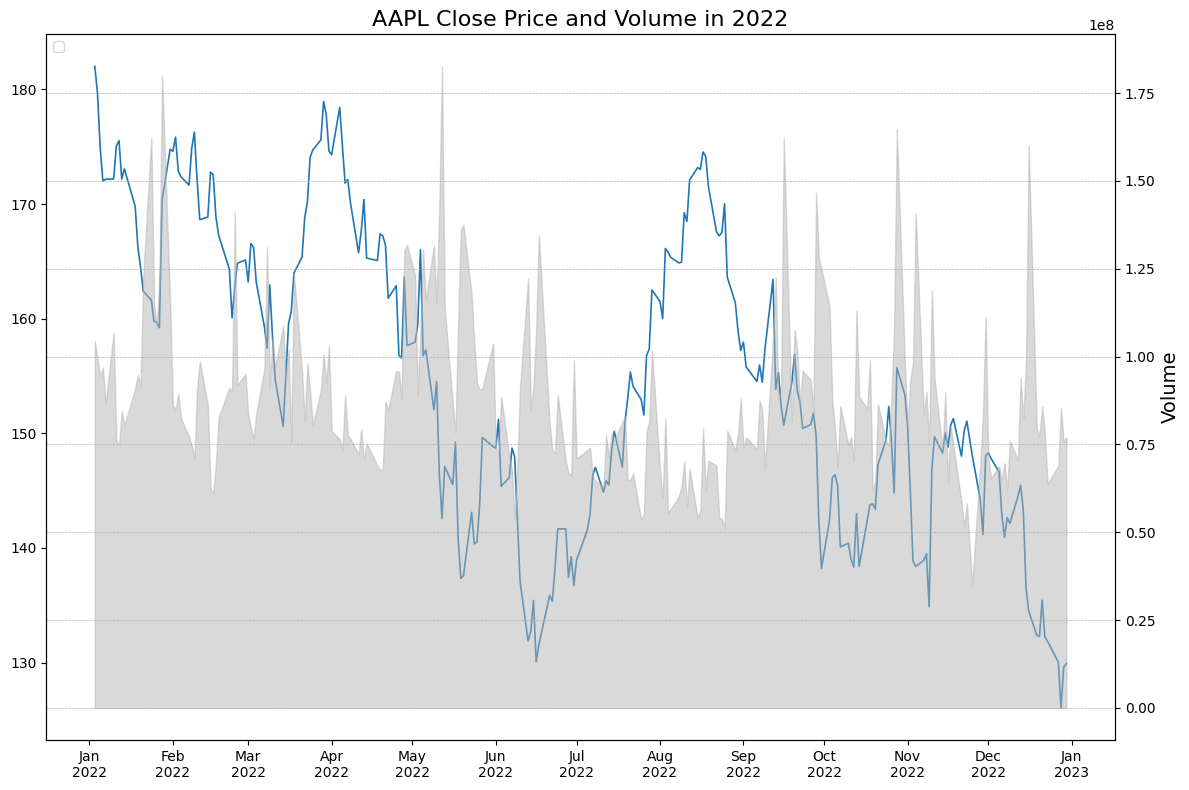

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fetch historical data
data = yf.download("AAPL", start="2022-01-01", end="2022-12-31")

# Create the plot
plt.figure(figsize=(12, 8))

# Plot closing prices
plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=1.2)

# Add volume bars
ax2 = plt.twinx()
ax2.fill_between(data.index, 0, data['Volume'], color='#b5b5b5', alpha=0.5)

# Format x-axis with date format
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.xticks(rotation=45, ha='right')

# Set title and labels
plt.title('AAPL Close Price and Volume in 2022', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
ax2.set_ylabel('Volume', fontsize=14)

# Add grid lines
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

# Add legend
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Enter stock symbol:  aapl


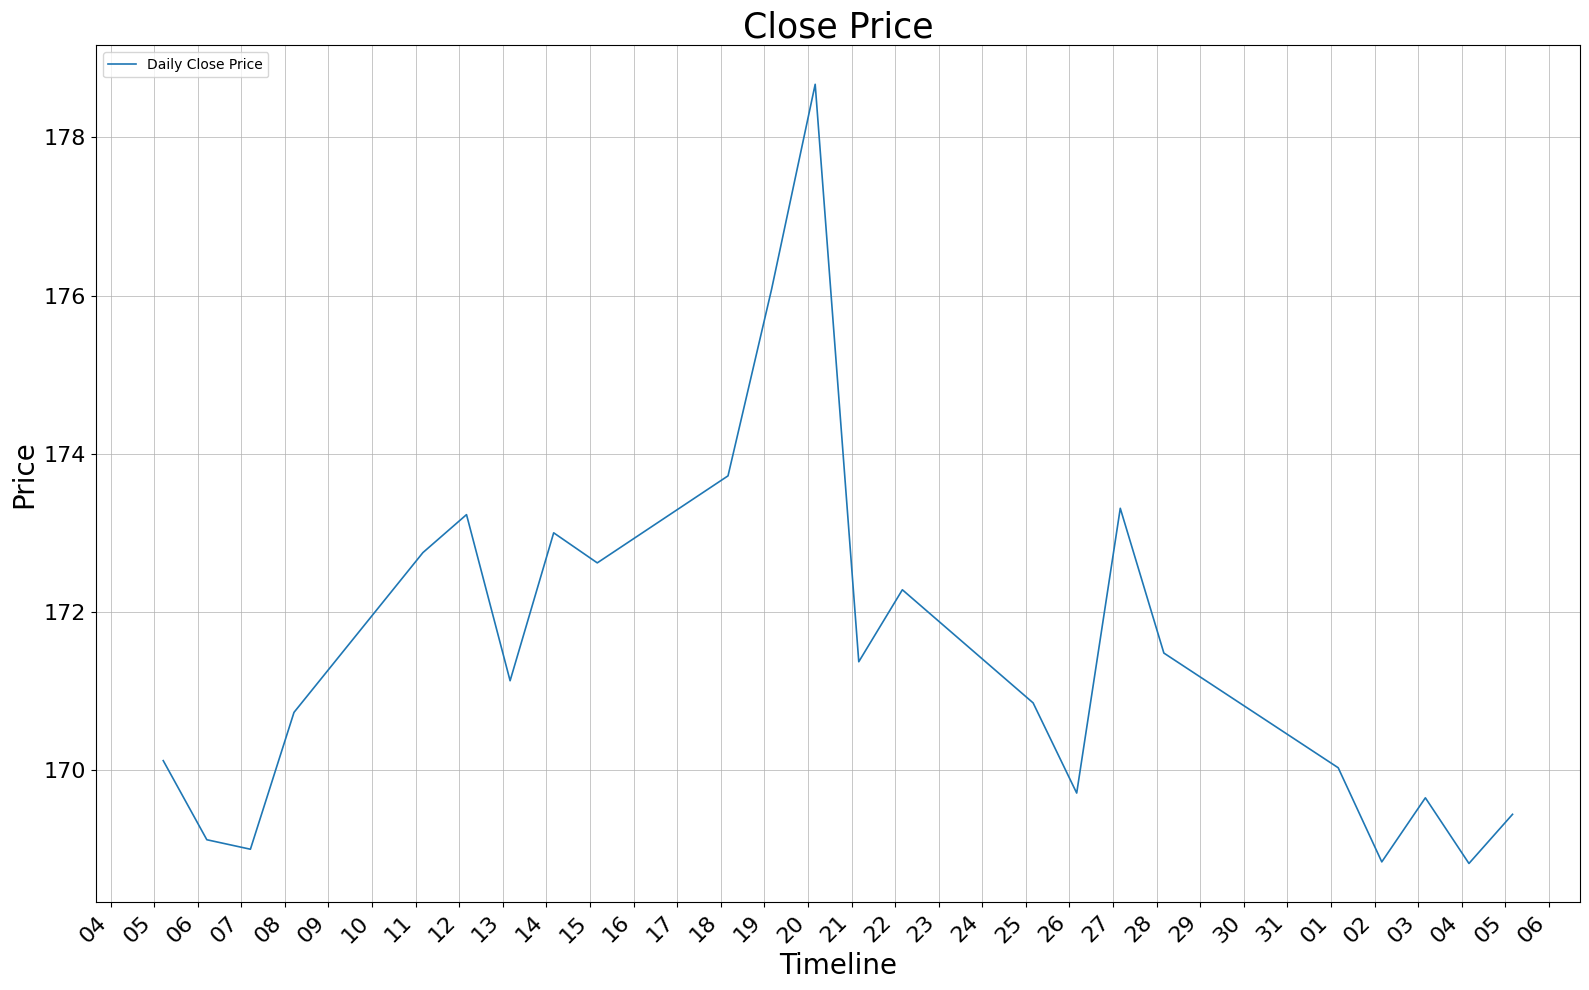

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

class Stock:
    def __init__(self, symbol):
        self.symbol = symbol

    def Interval_data(self):
        # Fetching historical data for 1 day interval
        plt.figure(figsize=(16,10))
        ticker = yf.Ticker(self.symbol)
        daily_data = ticker.history(period="1mo", interval="1d")

        # Plotting the data
        plt.plot(daily_data.index, daily_data['Close'], label='Daily Close Price', color='#1f77b4', linewidth=1.2)

        # Set title and labels
        plt.title('Close Price', fontsize=25)
        plt.xlabel('Timeline', fontsize=20)
        plt.ylabel('Price', fontsize=20)

        self.set_xaxis_labels(period=)
        
        # Add legend
        plt.legend(loc='upper left')
        
        # Adjust layout
        plt.tight_layout()
        
        # Show plot
        plt.show()

    import matplotlib.dates as mdates

def set_xaxis_labels(self, period, interval):
    # Setting the x axis locators and fetching data of specified period and differing by given time interval
    ax = plt.gca()  # Get the current axes
    
    if period.endswith('1d') and interval.endswith('m'):
        data = self.ticker.history(period=period, interval=interval)
        plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)
        
        plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
        plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))
        
    elif period.endswith('5d'):
        data = self.ticker.history(period=period, interval=interval)
        plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)
        
        plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))

    elif period.endswith('mo'):
        data = self.ticker.history(period=period, interval=interval)
        plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)
        
        # Set the gap between the two grid on x-axis
        if period.startswith('1'):
            plot_interval = 20
        elif period.startswith('3'):
            plot_interval = 5
        elif period.startswith('6'):
            plot_interval = 7
            
        plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator(interval=plot_interval)))

    elif period.endswith("y"):
        data = self.ticker.history(period=period, interval=interval)
        plt.plot(data['Close'], label='Close Price', color='#1f77b4', linewidth=2)

        if interval == "2m":
            plot_interval = 2
        elif interval == "12m":
            plot_interval = 12
        else:
            plot_interval = 2
             
        plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=plot_interval))
        plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%B'))  # Set major formatter for time display

        plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))

    # Adding titles and labels
    plt.title('S&P 500 Index', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    
    # Adding grid and legend
    plt.grid(True)
    plt.legend(loc='upper left')
    
    # Show plot
    plt.show()


def main():
    symbol = input("Enter stock symbol: ")
    stock = Stock(symbol)
    stock.Interval_data()
    stock.

if __name__ == "__main__":
    main()
